<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
def bisection(f,a_0,b_0,tol_x=0,tol_f=10**(-6)):
  # Input: f, [a,b], 
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  x_m=a_0+(b_0-a_0)/2
  while (abs(f(x_m))>tol_f) & (abs(b_0-a_0)>tol_x):
    if (f(x_m)*f(a_0)<0):
      b_0=x_m
    else:
      a_0=x_m
    x_m=a_0+(b_0-a_0)/2
  return (x_m)

In [23]:
import math
bisection(math.cos,0.025,math.pi-.0001)

1.5707961202997183

In [25]:
def Newton(f, fprime, x_0,tol_x=0,tol_f=10**(-6)):
  #Input: f, f', x_0,
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  if(fprime(x_0)==0):
    return('considere otro valor inicial')
  else: x_1=x_0+f(x_0)/fprime(x_0)
  while (abs(f(x_1))>tol_f) & (abs(x_0-x_1)>tol_x):
    if(fprime(x_1)==0): 
      break
    else:
      x_0=x_1
      x_1=x_0-f(x_0)/fprime(x_0)
  return x_1

In [26]:
Newton(math.sin,math.cos,3.1,tol_x=0.00001,tol_f=0.000001)

3.141592653587413

In [27]:
def secant(f,x_0,x_1,tol_x=0,tol_f=10**(-6)):
  #Input: f, 
  #         x_0, x_1: Aproximaciones iniciales.
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  while (abs(f(x_1))>tol_f) & (abs(x_0-x_1)>tol_x):
    x_aux=x_1
    x_1=(x_0*f(x_1)-x_1*f(x_0))/(f(x_1)-f(x_0))
    x_0=x_aux
  return x_1

In [ ]:
secant(math.sin,-math.pi/2+0.05,math.pi/3)

8.049693470823058e-09

In [65]:
def ejemplo1(x):
  return(math.exp(x)+2**(-x)+2*math.cos(x)-6)
def deriv_ejemplo1(x):
  return(math.exp(x)-math.log(2)*(2**(-x))-2*math.sin(x))
def ejemplo2(x):
  return(math.log(x-1)+math.cos(x-1))
def deriv_ejemplo2(x):
  return(1/(x-1)-math.sin(x-1))

In [31]:
x_b=bisection(ejemplo1,1,2)
x_N=Newton(ejemplo1,deriv_ejemplo1,1.5)
x_s=secant(ejemplo1,1,2)
print('Bisection: ', x_b,'\n','Newton: ', x_N,'\n','Secant: ', x_s,)
print('Function value-Bisection: ', ejemplo1(x_b),'\n','Function value-Newton: ', ejemplo1(x_N),'\n','Function value-Secant: ', ejemplo1(x_s),)

Bisection:  1.829383373260498 
 Newton:  1.8293836019359082 
 Secant:  1.8293834739842125
Function value-Bisection:  -9.37903522846284e-07 
 Function value-Newton:  8.446576771348191e-12 
 Function value-Secant:  -5.24785351174728e-07


In [70]:
#x_b=bisection(ejemplo2,1.3,2)
x_N=Newton(ejemplo2,deriv_ejemplo2,1.31)
x_N
#x_s=secant(ejemplo2,1.3,2)
#print('Bisection: ', x_b,'\n','Newton: ', x_N,'\n','Secant: ', x_s,)
#print('Function value-Bisection: ', ejemplo2(x_b),'\n','Function value-Newton: ', ejemplo2(x_N),'\n','Function value-Secant: ', ejemplo2(x_s),)

1.3977484753651963

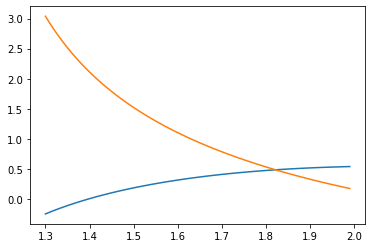

In [76]:
x=np.arange(1.3,2,0.01)
v_ejemplo2=np.vectorize(ejemplo2)
v_deriv_ejemplo2=np.vectorize(deriv_ejemplo2)
plt.plot(x,v_ejemplo2(x))
plt.plot(x,v_deriv_ejemplo2(x))
